In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

url = "http://www.mbnet.com.pl/dl.txt"
file = urllib.request.urlopen(url)
wyniki = []

for line in file:
    linia = line.decode("utf-8")
    wyniki.append(linia)
    
lastdate = wyniki[-1].split(" ")[1]
firstdate = wyniki[-6000].split(" ")[1]

In [ ]:
#dane - komplet wyników postaci para: częstość
dane = {}

for i in range(1,50):
  for j in range(i+1,50):
    dane[(i,j)] = 0

#oddzielenie liczb od siebie i ustalenie parzystości
odddata = []
for index in range(-1,-6001,-1):
  s = (wyniki[index].split(" ")[2].replace("\r\n","")).split(",")
  wynik = [] #lista na wyniki pojedynczego losowania
  odd = 0 #ilość nieparzystych liczb w jednym losowaniu

  for i in range(6): #pętla analizująca pojedyncze losowanie
    wynik.append(int(s[i])) 
    if (int(s[i])%2 == 1):
      odd += 1
  odddata.append(odd)
  for j in range (1,6): #pętla do aktualizacji struktury przechowującej liczby wystąpień (dane)
    for i in range(j,6):
      dane[(wynik[j-1],wynik[i])] = dane[(wynik[j-1],wynik[i])] + 1
v = list(dane.values())
v.sort(reverse=True)
limit = v[19] #granica dla 20 najczęstszych par

In [ ]:
import pandas as pd
p = list(dane.keys())
c = list(dane.values())
avg = sum(c)/len(c) #średnia liczba wystąpień pary

df = pd.DataFrame(c,index=p) #DataFrame dla wszystkich par
df2 = df[df[0] >= limit] #DataFrame dla 20 najczęstszych par
df3 = df2.sort_values(0,ascending=False) #posortowane malejąco
columns = ['Częstość']
df3.columns = columns

#piedata - struktura dane o liczbie parzystych (P) i nieparzystych (NP) liczb
piedata = {"6P 0N": 0, "5P 1N": 0, "4P 2N": 0, "3P 3N": 0, "2P 4N": 0, "1P 5N": 0, "0P 6N": 0}
for i in range(len(odddata)):
  n = odddata[i]
  key = str(6-n) + "P " + str(n) + "N"
  piedata[key] = piedata[key] + 1 

pielabels = piedata.keys()
pievalues = list(piedata.values())


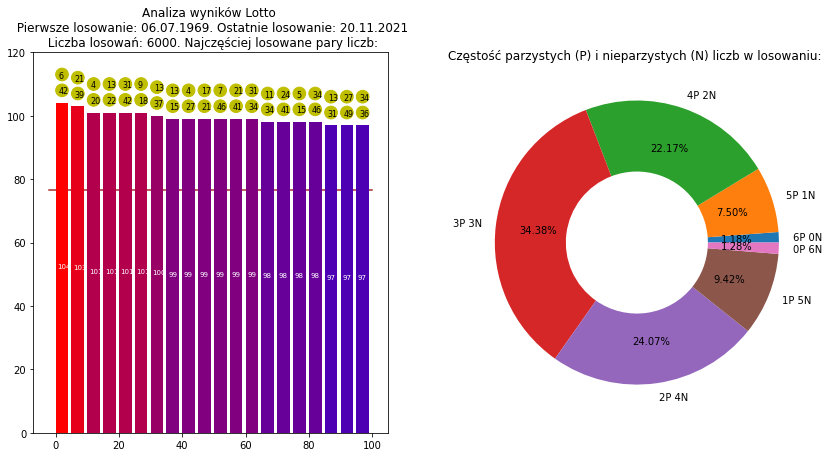

In [ ]:
def setcolor(maxvalue,value):
    code = 1 - (maxvalue-value)/10
    return((code,0,1-code))

#ustalenie kolorów słupków
colors = []
for i in range(20):
  colors.append(setcolor(104,df3["Częstość"][i]))

fig, ax = plt.subplots(figsize=(14,7))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
values = df3["Częstość"].to_list()
keys = list(df3.index) #lista 20 najczęstszych par
xvalues = []
for i in range(20):
  xvalues.append(i*5)


ax1.bar(xvalues,values,width=4,align='edge', color=colors,zorder=1)
ax1.set_ylim(0,120)
for i in range(len(ax1.patches)):
  patch = ax1.patches[i]
  #wpisywanie numerów do kółek nad słupkami
  ax1.text(y=patch.get_height()+8,
            x=patch.get_x()+1,
            s=str(keys[i][0]),
            fontsize=8,
            fontweight='normal',
            color='black')
  ax1.text(y=patch.get_height()+3,
            x=patch.get_x()+1,
            s=str(keys[i][1]),
            fontsize=8,
            fontweight='normal',
            color='black')
  #ustawienie tekstu z liczbą powtórzenia danej pary wewnątrz słupka
  ax1.text(y=patch.get_height()/2,
            x=patch.get_x()+0.5,
            s=str(values[i]),
            fontsize=7,
            fontweight='normal',
            color='white')
  
#narysowanie kółek
for i in range(20):
  circle = plt.Circle((5*i+2, values[i]+4), 2, color='y')
  ax1.add_patch(circle)
  circle = plt.Circle((5*i+2, values[i]+9), 2, color='y')
  ax1.add_patch(circle)

ax1.set_title("Analiza wyników Lotto \n Pierwsze losowanie: " + firstdate + ". Ostatnie losowanie: " + lastdate + "\n Liczba losowań: 6000. Najczęściej losowane pary liczb:")

#ustawienie linii referencyjnej
ax1.plot([-2,100],[avg,avg],"-",color='brown',zorder=0)

#stworzenie wykresu pierścieniowego 
ax2.pie(pievalues, labels=pielabels, autopct='%1.2f%%', pctdistance = 0.7, wedgeprops={'width': 0.5})
ax2.set_title("Częstość parzystych (P) i nieparzystych (N) liczb w losowaniu: ")

plt.savefig('06_lew_275116.png',dpi=300)